<a href="https://colab.research.google.com/github/SofiaShvedova/Programming-for-analysts/blob/main/lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

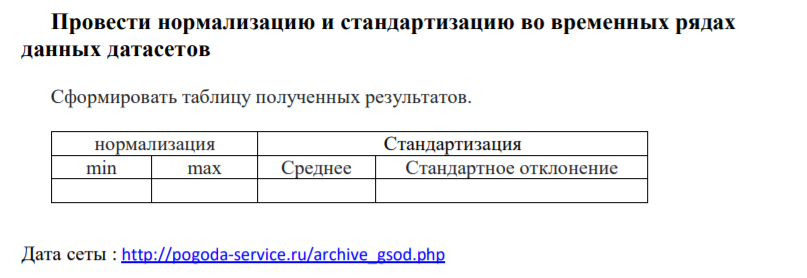

image.png

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt

url='http://pogoda-service.ru/archive_gsod_res.php?country=CA&station=711080&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=Посмотреть'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]
df

,ÐÐ°ÑÐ°,ÐÐ°ÐºÑÐ¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÐ¸Ð½Ð¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÑÐ¼Ð¾ÑÑÐµÑÐ½Ð¾Ðµ Ð´Ð°Ð²Ð»ÐµÐ½Ð¸Ðµ,Ð¡ÐºÐ¾ÑÐ¾ÑÑÑ Ð²ÐµÑÑÐ°,ÐÑÐ°Ð´ÐºÐ¸,Ð­ÑÑÐµÐºÑÐ¸Ð²Ð½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,7.0,3.0,4.5,1010.0,1,8,2.9
1,02.12.2010,6.9,-0.2,2.8,1012.0,2,0,0.3
2,03.12.2010,6.0,2.0,3.4,1014.3,2,5,0.9
3,04.12.2010,6.0,1.0,3.2,1018.9,4,0,-1.0
4,05.12.2010,6.4,0.2,3.4,1015.8,5,0,-1.6
...,...,...,...,...,...,...,...,...
995,22.08.2013,28.0,12.8,19.7,NaN,2,0,19.4
996,23.08.2013,28.4,11.7,19.7,1003.1,3,0,18.9
997,24.08.2013,23.8,14.4,18.1,1005.1,2,4,18.0
998,25.08.2013,24.0,10.7,17.7,1006.1,2,0,17.2


In [2]:
df.columns=['Date', 'Max temp', 'Min temp', 'Av temp','Atm pressure','Percipitation', 'Wind speed', 'Effective temp']

In [3]:
df

,Date,Max temp,Min temp,Av temp,Atm pressure,Percipitation,Wind speed,Effective temp
0,01.12.2010,7.0,3.0,4.5,1010.0,1,8,2.9
1,02.12.2010,6.9,-0.2,2.8,1012.0,2,0,0.3
2,03.12.2010,6.0,2.0,3.4,1014.3,2,5,0.9
3,04.12.2010,6.0,1.0,3.2,1018.9,4,0,-1.0
4,05.12.2010,6.4,0.2,3.4,1015.8,5,0,-1.6
...,...,...,...,...,...,...,...,...
995,22.08.2013,28.0,12.8,19.7,NaN,2,0,19.4
996,23.08.2013,28.4,11.7,19.7,1003.1,3,0,18.9
997,24.08.2013,23.8,14.4,18.1,1005.1,2,4,18.0
998,25.08.2013,24.0,10.7,17.7,1006.1,2,0,17.2


In [4]:
df = df[['Date', 'Av temp']]
df.set_index(['Date'], inplace=True)
df

,Av temp
Date,
01.12.2010,4.5
02.12.2010,2.8
03.12.2010,3.4
04.12.2010,3.2
05.12.2010,3.4
...,...
22.08.2013,19.7
23.08.2013,19.7
24.08.2013,18.1


# **Нормализация**

In [5]:
values = df.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

Min: -11.700000, Max: 25.700000
[0.43315508]
[0.38770053]
[0.40374332]
[0.39839572]
[0.40374332]
[4.5]
[2.8]
[3.4]
[3.2]
[3.4]


# **Гистрограмма**

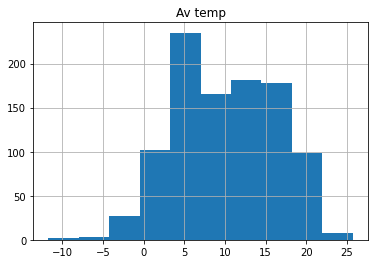

In [6]:
df.hist()
plt.show()

# **Стандартизация**

In [7]:
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
norm = scaler.transform(values)
for i in range(5):
  print(norm[i])
inversed = scaler.inverse_transform(norm)
for i in range(5):
  print(inversed[i])

Mean: 10.080000, StandardDeviation: 6.182432
[-0.9025575]
[-1.17753022]
[-1.08048103]
[-1.11283076]
[-1.08048103]
[4.5]
[2.8]
[3.4]
[3.2]
[3.4]


# **Итог**

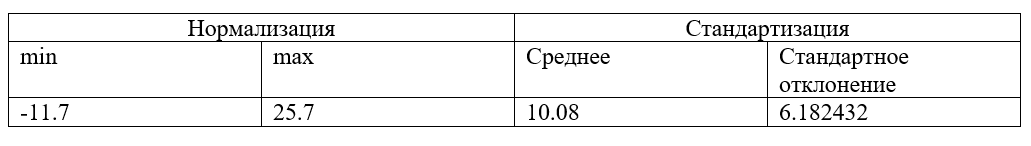